In [44]:
import os
import joblib
import pickle as pkl

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

from preprocessing import load_preprocessed_hawks, load_preprocessed_congressional, load_preprocessed_bankruptcy, load_preprocessed_location
from holdout_vs_cv import compare_holdout_vs_cv

In [57]:
X_hawks, y_hawks = load_preprocessed_hawks(scale=True, splitXY=True)
X_voting, y_voting = load_preprocessed_congressional(splitXY=True)
X_location, y_location = load_preprocessed_location(splitXY=True)
X_bankruptcy, y_bankruptcy = load_preprocessed_bankruptcy(scale=True, splitXY=True)

hawks_knn_search = joblib.load('gridsearch_cv/hawks_rv_knn.pkl')
hawks_rf_search = joblib.load('gridsearch_cv/hawks_rv_rf.pkl')
hawks_svm_search = joblib.load('gridsearch_cv/hawks_rv_svm.pkl')

congresional_knn_search = joblib.load('gridsearch_cv/congresional_rv_knn.pkl')
congresional_rf_search = joblib.load('gridsearch_cv/congresional_rv_rf.pkl')
congresional_svm_search = joblib.load('gridsearch_cv/congresional_rv_svm.pkl')

location_knn_search = joblib.load('gridsearch_cv/location_rv_knn.pkl')
location_rf_search = joblib.load('gridsearch_cv/location_rv_rf.pkl')
location_svm_search = joblib.load('gridsearch_cv/location_rv_svm.pkl')

bankruptcy_knn_search = joblib.load('gridsearch_cv/bankruptcy_rv_knn.pkl')
bankruptcy_rf_search = joblib.load('gridsearch_cv/bankruptcy_rv_rf.pkl')
bankruptcy_svm_search = joblib.load('gridsearch_cv/bankruptcy_rv_svm.pkl')

C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 0.24.2. This might lead to breaking code or 

In [58]:
location_knn_search.best_params_

{'knn__n_neighbors': 56,
 'knn__p': 2,
 'knn__weights': 'distance',
 'pca__n_components': 20}

In [59]:
location_rf_search.best_params_

{'pca__n_components': 50,
 'rf__criterion': 'gini',
 'rf__max_depth': 25,
 'rf__n_estimators': 3500}

In [60]:
location_svm_search.best_params_

{'pca__n_components': 26, 'svm__C': 0.7, 'svm__kernel': 'linear'}

In [63]:
knn_hawks = KNeighborsClassifier(**hawks_knn_search.best_params_)
rf_hawks = RandomForestClassifier(**hawks_rf_search.best_params_)
svm_hawks = SVC(**hawks_svm_search.best_params_)
models_hawks = {"knn": knn_hawks, "r_forest": rf_hawks, "svm": svm_hawks}
scores_hawks = compare_holdout_vs_cv(models_hawks, X_hawks, y_hawks, k_folds=5, n_seeds=50)

 Scores calculated for random seed 50 / 50

knn
   accuracy:
      Average Hold-out accuracy: 0.98663 +- 0.00727
      Average    CV    accuracy: 0.98749 +- 0.00066
   f1:
      Average Hold-out f1: 0.96672 +- 0.01928
      Average    CV    f1: 0.97017 +- 0.00155
   duration:
      Average Hold-out duration: 0.00754 +- 0.00784
      Average    CV    duration: 0.03936 +- 0.01363


r_forest
   accuracy:
      Average Hold-out accuracy: 0.98652 +- 0.00778
      Average    CV    accuracy: 0.98666 +- 0.00129
   f1:
      Average Hold-out f1: 0.96669 +- 0.01962
      Average    CV    f1: 0.96781 +- 0.00363
   duration:
      Average Hold-out duration: 0.14059 +- 0.02321
      Average    CV    duration: 0.66413 +- 0.06583


svm
   accuracy:
      Average Hold-out accuracy: 0.98348 +- 0.00765
      Average    CV    accuracy: 0.98436 +- 0.0013
   f1:
      Average Hold-out f1: 0.96275 +- 0.01875
      Average    CV    f1: 0.96516 +- 0.00207
   duration:
      Average Hold-out duration: 0.0072 +

In [64]:
knn_voting = KNeighborsClassifier(**congresional_knn_search.best_params_)
rf_voting = RandomForestClassifier(**congresional_rf_search.best_params_)
svm_voting = SVC(**congresional_svm_search.best_params_)
models_voting = {"knn": knn_voting, "r_forest": rf_voting, "svm": svm_voting}
scores_voting = compare_holdout_vs_cv(models_voting, X_voting, y_voting, k_folds=5, n_seeds=50)

 Scores calculated for random seed 50 / 50

knn
   accuracy:
      Average Hold-out accuracy: 0.93273 +- 0.03308
      Average    CV    accuracy: 0.93013 +- 0.01007
   f1:
      Average Hold-out f1: 0.92982 +- 0.03428
      Average    CV    f1: 0.9289 +- 0.0103
   duration:
      Average Hold-out duration: 0.00478 +- 0.00533
      Average    CV    duration: 0.03136 +- 0.015


r_forest
   accuracy:
      Average Hold-out accuracy: 0.95 +- 0.03246
      Average    CV    accuracy: 0.94957 +- 0.00611
   f1:
      Average Hold-out f1: 0.94771 +- 0.03365
      Average    CV    f1: 0.94849 +- 0.00725
   duration:
      Average Hold-out duration: 0.03725 +- 0.00987
      Average    CV    duration: 0.19435 +- 0.02051


svm
   accuracy:
      Average Hold-out accuracy: 0.95318 +- 0.0278
      Average    CV    accuracy: 0.95113 +- 0.0057
   f1:
      Average Hold-out f1: 0.95126 +- 0.02862
      Average    CV    f1: 0.95037 +- 0.00579
   duration:
      Average Hold-out duration: 0.00308 +- 0.003

In [65]:
knn_bankruptcy = KNeighborsClassifier(**bankruptcy_knn_search.best_params_)
rf_bankruptcy = RandomForestClassifier(**bankruptcy_rf_search.best_params_)
svm_bankruptcy = SVC(**bankruptcy_svm_search.best_params_)
models_bankruptcy = {"knn": knn_bankruptcy, "r_forest": rf_bankruptcy, "svm": svm_bankruptcy}
scores_bankruptcy = compare_holdout_vs_cv(models_bankruptcy, X_bankruptcy, y_bankruptcy, k_folds=5, n_seeds=50)

 Scores calculated for random seed 50 / 50

knn
   accuracy:
      Average Hold-out accuracy: 0.94624 +- 0.00594
      Average    CV    accuracy: 0.94572 +- 0.00044
   f1:
      Average Hold-out f1: 0.51917 +- 0.02136
      Average    CV    f1: 0.52173 +- 0.00509
   duration:
      Average Hold-out duration: 0.17616 +- 0.03237
      Average    CV    duration: 1.02473 +- 0.05738


r_forest
   accuracy:
      Average Hold-out accuracy: 0.94702 +- 0.00601
      Average    CV    accuracy: 0.94614 +- 0.00089
   f1:
      Average Hold-out f1: 0.56544 +- 0.0334
      Average    CV    f1: 0.56448 +- 0.00966
   duration:
      Average Hold-out duration: 2.43156 +- 0.34826
      Average    CV    duration: 10.31584 +- 0.74064


svm
   accuracy:
      Average Hold-out accuracy: 0.9455 +- 0.00589
      Average    CV    accuracy: 0.94479 +- 0.0
   f1:
      Average Hold-out f1: 0.48599 +- 0.00156
      Average    CV    f1: 0.48581 +- 0.0
   duration:
      Average Hold-out duration: 0.44276 +- 0.127

## Accuracy comparison

In [66]:
knn_list = ["k-NN"] * 50
rf_list = ["Random Forest"] * 50
svm_list = ["SVM"] * 50
names = knn_list + rf_list + svm_list

    
ho_accuracies = scores_bankruptcy["knn"]["accuracy"]["ho_scores"] + scores_bankruptcy["r_forest"]["accuracy"]["ho_scores"] + scores_bankruptcy["svm"]["accuracy"]["ho_scores"]
cv_accuracies = scores_bankruptcy["knn"]["accuracy"]["cv_scores"] + scores_bankruptcy["r_forest"]["accuracy"]["cv_scores"] + scores_bankruptcy["svm"]["accuracy"]["cv_scores"]

accuracies = pd.DataFrame(list(zip(names, ho_accuracies, cv_accuracies)), columns =['alg', 'Holdout', "5-fold CV"])
accuracies.to_csv("hyperparam_plots/accuracies.csv")
accuracies

alg   Holdout  5-fold CV
0    k-NN  0.940741   0.945535
1    k-NN  0.940741   0.946092
2    k-NN  0.949074   0.944794
3    k-NN  0.950926   0.945906
4    k-NN  0.958333   0.945721
..    ...       ...        ...
145   SVM  0.953704   0.944795
146   SVM  0.935185   0.944795
147   SVM  0.950926   0.944795
148   SVM  0.944444   0.944795
149   SVM  0.945370   0.944795

[150 rows x 3 columns]

## F1-score comparison

In [67]:
ho_f1s = scores_bankruptcy["knn"]["f1"]["ho_scores"] + scores_bankruptcy["r_forest"]["f1"]["ho_scores"] + scores_bankruptcy["svm"]["f1"]["ho_scores"]
cv_f1s = scores_bankruptcy["knn"]["f1"]["cv_scores"] + scores_bankruptcy["r_forest"]["f1"]["cv_scores"] + scores_bankruptcy["svm"]["f1"]["cv_scores"]

f1s = pd.DataFrame(list(zip(names, ho_f1s, cv_f1s)), columns =['alg', 'Holdout', "5-fold CV"])
f1s.to_csv("hyperparam_plots/f1s.csv")
f1s

alg   Holdout  5-fold CV
0    k-NN  0.514115   0.514861
1    k-NN  0.514115   0.524078
2    k-NN  0.486936   0.513917
3    k-NN  0.522487   0.526284
4    k-NN  0.530158   0.520847
..    ...       ...        ...
145   SVM  0.488152   0.485807
146   SVM  0.483254   0.485807
147   SVM  0.487423   0.485807
148   SVM  0.485714   0.485807
149   SVM  0.485959   0.485807

[150 rows x 3 columns]

## Duration comparison

In [68]:
datasets = ["Voting", "Hawks", "Bankruptcy"]
ho_durations = [scores_voting["knn"]["duration"]["ho_mean"], scores_hawks["knn"]["duration"]["ho_mean"], scores_bankruptcy["knn"]["duration"]["ho_mean"]]
cv_durations = [scores_voting["knn"]["duration"]["cv_mean"], scores_hawks["knn"]["duration"]["cv_mean"], scores_bankruptcy["knn"]["duration"]["cv_mean"]]

Text(0, 0.5, 'average duration [s]')

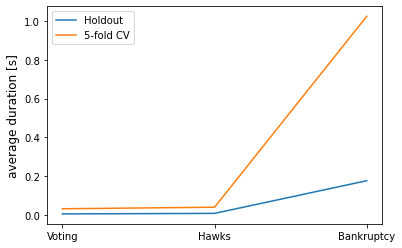

In [69]:
plt.plot(datasets, ho_durations, label="Holdout")
plt.plot(datasets, cv_durations, label="5-fold CV")
plt.legend()
plt.ylabel("average duration [s]", fontsize= 12)
# plt.savefig("hyperparam_plots/ho_vs_cv_durations_knn.png")

In [70]:
ho_durations = {}
cv_durations = {}

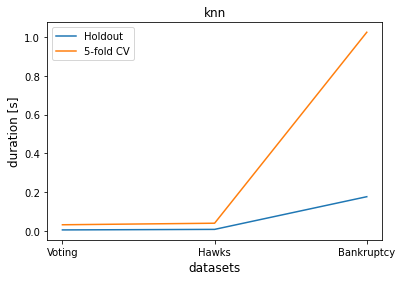

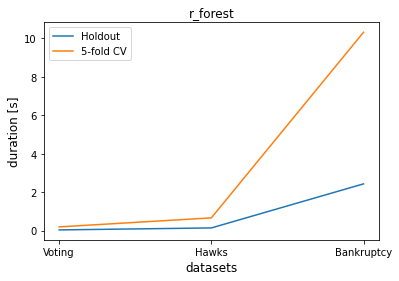

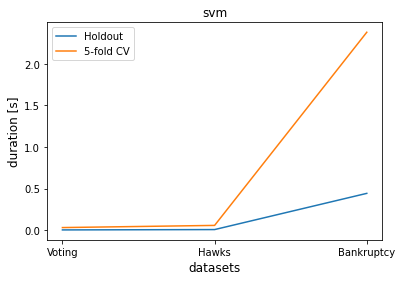

In [71]:
for model in ["knn", "r_forest", "svm"]:
    ho_durations[model] = [scores_voting[model]["duration"]["ho_mean"], scores_hawks[model]["duration"]["ho_mean"], scores_bankruptcy[model]["duration"]["ho_mean"]]
    cv_durations[model] = [scores_voting[model]["duration"]["cv_mean"], scores_hawks[model]["duration"]["cv_mean"], scores_bankruptcy[model]["duration"]["cv_mean"]]
    
    plt.plot(datasets, ho_durations[model], label="Holdout")
    plt.plot(datasets, cv_durations[model], label="5-fold CV")
    plt.xlabel("datasets", fontsize= 12)
    plt.ylabel("duration [s]", fontsize= 12)
    plt.legend()
    plt.title(model)
    plt.show()

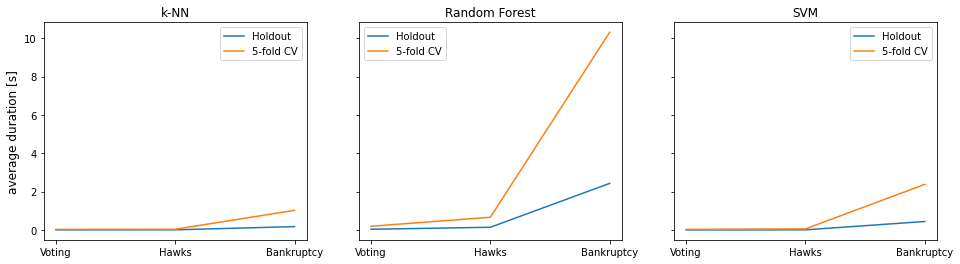

In [72]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 4))

for i, model in enumerate(["knn", "r_forest", "svm"]):
    ho_durations[model] = [scores_voting[model]["duration"]["ho_mean"], scores_hawks[model]["duration"]["ho_mean"], scores_bankruptcy[model]["duration"]["ho_mean"]]
    cv_durations[model] = [scores_voting[model]["duration"]["cv_mean"], scores_hawks[model]["duration"]["cv_mean"], scores_bankruptcy[model]["duration"]["cv_mean"]]
    
    axs[i].plot(datasets, ho_durations[model], label="Holdout")
    axs[i].plot(datasets, cv_durations[model], label="5-fold CV")
    axs[i].legend()
    
axs[0].set_ylabel("average duration [s]", fontsize= 12)
axs[0].set_title("k-NN", fontsize= 12)
axs[1].set_title("Random Forest", fontsize= 12)
axs[2].set_title("SVM", fontsize= 12)

plt.savefig("hyperparam_plots/ho_vs_cv_durations.png")

In [73]:
for i, model in enumerate(["knn", "r_forest", "svm"]):
    print(f"Holdout {model} duration: {ho_durations[model]}")
    print(f"  CV    {model} duration: {cv_durations[model]}")

Holdout knn duration: [0.004784417152404785, 0.007537493705749512, 0.1761624813079834]
  CV    knn duration: [0.03136151313781738, 0.03935749053955078, 1.0247293329238891]
Holdout r_forest duration: [0.037250094413757324, 0.14059040546417237, 2.431555109024048]
  CV    r_forest duration: [0.1943483543395996, 0.6641328716278077, 10.315838799476623]
Holdout svm duration: [0.0030809688568115235, 0.007202801704406739, 0.4427628993988037]
  CV    svm duration: [0.031279373168945315, 0.05733882427215576, 2.3807832193374634]


In [42]:
#pca_knn = PCA(n_components=20)
knn_location = KNeighborsClassifier(n_neighbors=56, p=2, weights="distance")
#model_knn = make_pipeline(pca_knn, knn_location)

#pca_rf = PCA(n_components=50)
rf_location = RandomForestClassifier(n_estimators=3500, max_depth=25, criterion="gini")
#model_rf = make_pipeline(pca_rf, rf_location)

#pca_svm = PCA(n_components=26)
svm_location = SVC(C=0.7, kernel="linear")
#model_svm = make_pipeline(pca_svm, svm_location)


#models_location = {"knn": model_knn, "r_forest": model_rf, "svm": model_svm}
models_location = {"knn": knn_location, "r_forest": rf_location, "svm": svm_location}
scores_location = compare_holdout_vs_cv(models_location, X_location, y_location, k_folds=5, n_seeds=50)

 Scores calculated for random seed 3 / 50

KeyboardInterrupt: 